사이토 고키, 2017, 한빛미디어, 밑바닥부터 시작하는 딥러닝 

In [3]:
from util import show_image
import numpy as np

### 가중치 초깃값


##### 가중치 감소(weight decay) 기법 - 오버피팅을 억제해 범용 성능을 높이는 기법
    : 가중치 매개변수의 값이 작아지도록 학습하며, 초깃값도 최대한 작은 값에서 출발
    : 그렇다면 0으로 초기화하면? -> 갱신이 똑같게 되므로 여러개의 가중치를 갖는 의미가 없다.
    
>sigmoid함수에서의 가중치 초기화 -> Xavier 초깃값 알고리즘  
>ReLU함수에서의 가중치 초기화 -> He 초깃값 알고리즘

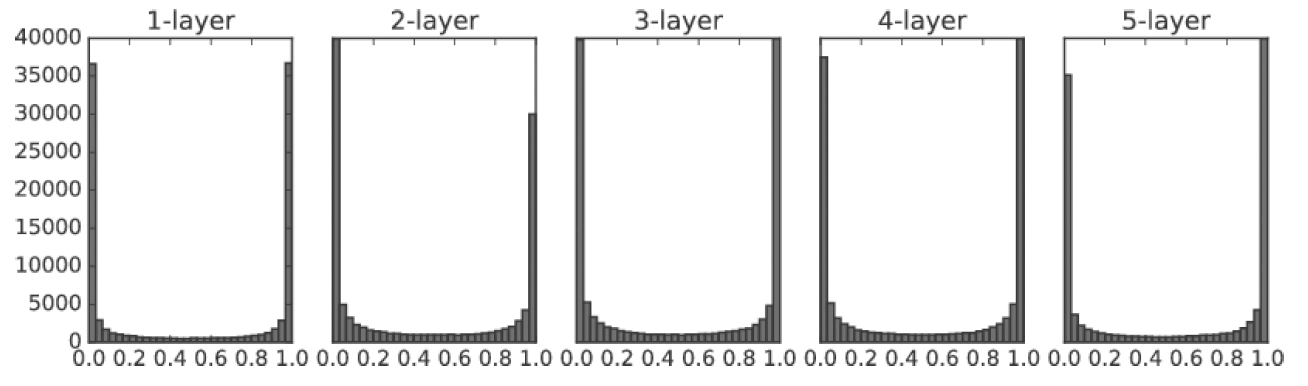

In [4]:
"""
    sigmoid함수에서의 가중치 초기화 
"""

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

# 5개 hidden_layer 쌓기
for i in range(hidden_layer_size):
    if i != 0:
        x =activations[i-1]
    w = np.random.randn(node_num, node_num) * 1 #표준편차 1의 정규분포
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

"""
    5층 hidden layer에서 활성화값(은닉층의 출력 데이터)의 특징
    :0과 1에 치우쳐있으며 역전파(5->1 layer)가 될수록 기울기 값이 사라진다. -> sigmoid함수는 0에서 멀어질수록 미분값이 0에 가까워짐
    :기울기 값이 점점 사라지는 것을 '기울기 소실(gradient vanishing)'이라 한다.
    :역전파에서 단계가 갈수록 기울기가 0에 가까워지면 질수록 가중치가 제대로 갱신되지 않는다.
"""
show_image('fig 6-10.png',width=800)

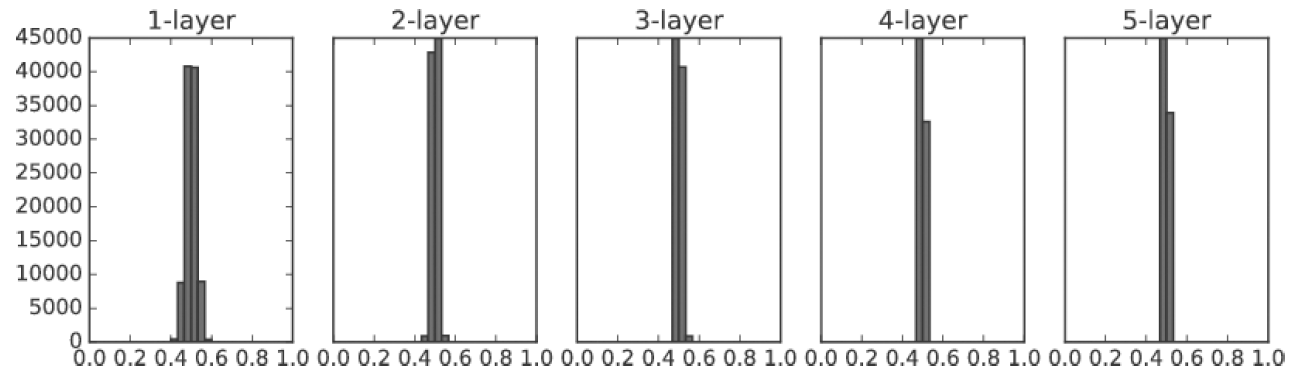

In [6]:
# 5개 hidden_layer 쌓기
for i in range(hidden_layer_size):
    if i != 0:
        x =activations[i-1]
    w = np.random.randn(node_num, node_num) * 0.01 #표준편차 0.01의 정규분포
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

"""
    5층 hidden layer에서 활성화값(은닉층의 출력 데이터)의 특징
    : 0.5에 집중되어 있다.
    : 다수의 뉴런이 거의 같은 값을 출력하고 있어서 여러 개 둔 의미가 없어진다.
    : 활성화값들이 치우치면 '표현력을 제한'이라 한다.
    : 100개의 노드가 1개의 노드처럼 행동하니 효율성의 문제가 생긴다.
"""
show_image('fig 6-11.png',width=800)

앞 층의 노드가 많을수록 가중치 분포의 표준편차는 작게 설정된다.


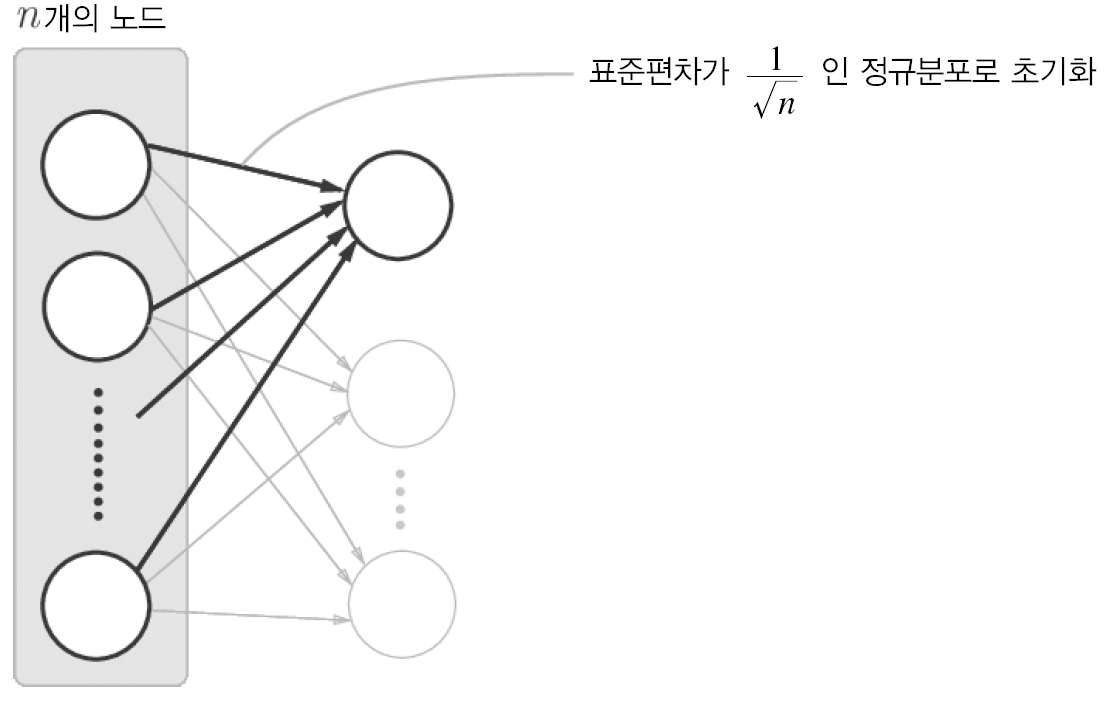

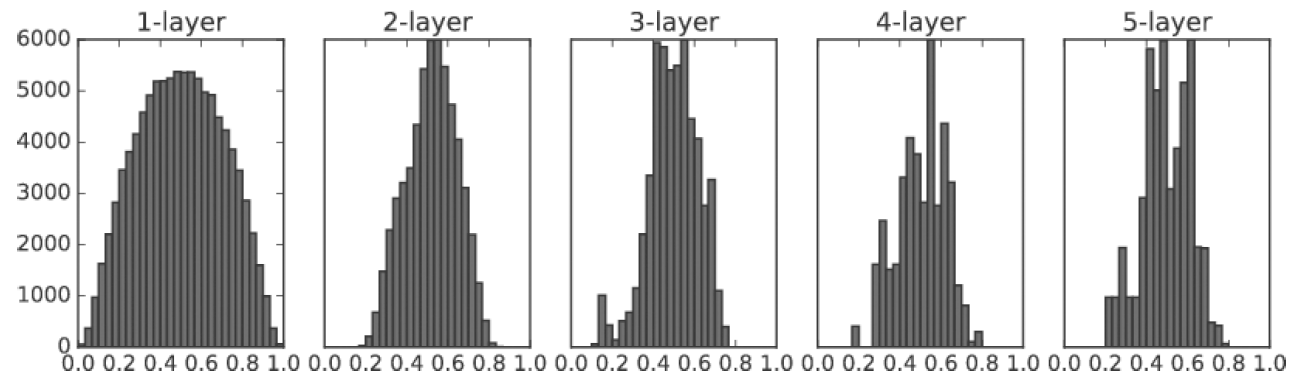

In [9]:
"""
    Xavier 초깃값 - 활성화함수가 선형인 것을 전제(sigmoid는 좌우대칭으로 중앙부근은 선형으로 볼 수 있다.)
"""
for i in range(hidden_layer_size):
    if i != 0:
        x =activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num) #표준편차 1/(앞 노드 수의 제곱근)인 정규분포
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

show_image(['fig 6-12.png','fig 6-13.png'],title=['앞 층의 노드가 많을수록 가중치 분포의 표준편차는 작게 설정된다.',''],width=[400,700])

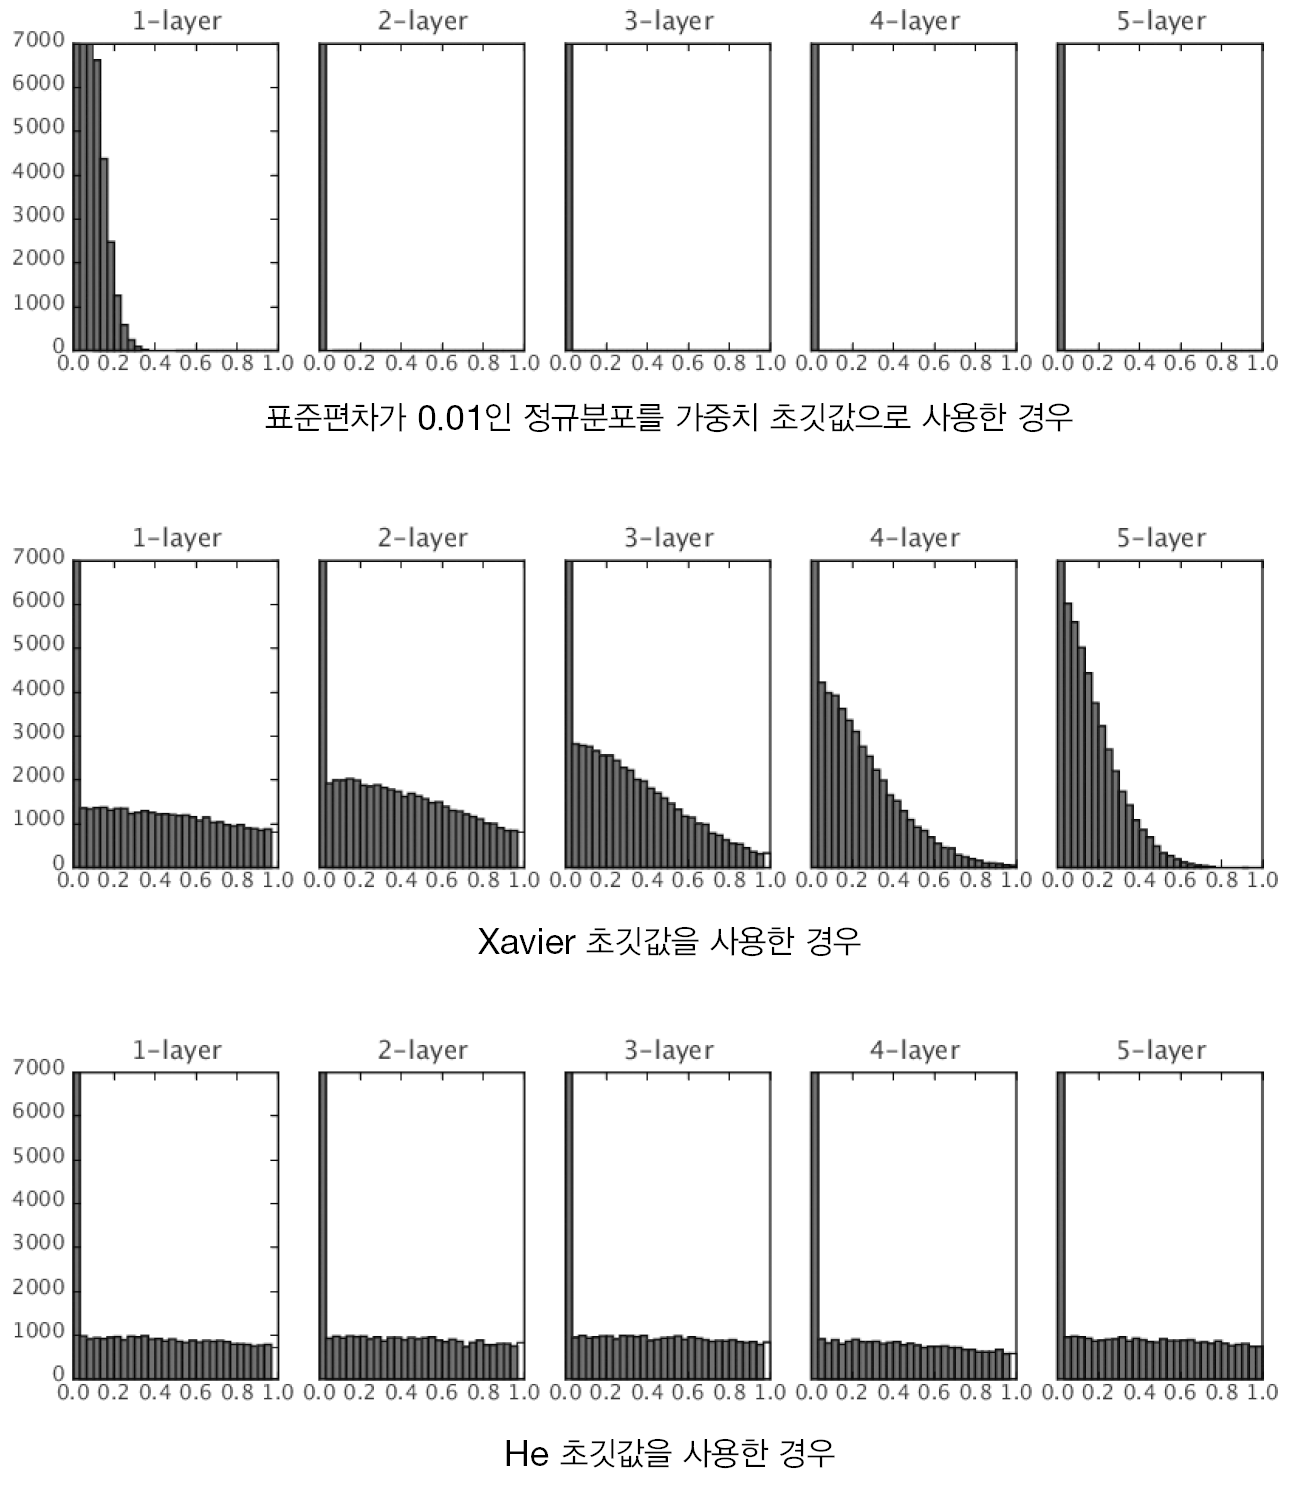

In [10]:
"""
    ReLU함수에서의 가중치 초기화
"""
def ReLU(x):
    return np.maximum(0, x)

for i in range(hidden_layer_size):
    if i != 0:
        x =activations[i-1]
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num) #표준편차 (2/앞 노드 수의 제곱근) 정규분포
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

show_image('fig 6-14.png',width=700)